# ¿Qué respiramos en hospitales?
Se obtiene un data set a partir de muestras recogidas en diferentes estancias de una unidad de quemados en un hospital. Hay muestras de superficies (manillares de camas, puertas, asientos, suelo, mesas) y muestras recogidas con un muestreador de aire de diferentes estancias, tanto de la parte ambulatoria( pasillos, sala de espera, consultas, sala de curas) como de la parte clínica (quirófanos, uvi, habitaciones de ingresos, sala de curas). Con todo este tipo de muestras se realizan extracciones de DNA y se analizan los resultados, para clasificar los microoganismos recogidos en los muestreos el gen 16S que se usa para su clasificación taxonómica. 
Por otro lado en cada estancia se toman medidas de diferentes parmetros que pueden alterar la aparición o no de determinados microorganismos, humedad relativa, temperatura, partículas en suspensión

### Data frame ##
Por un lado tengo el data set taxonómico, y por otro lado tengo el data set de los metadatos(humedad relativa , temperatura etc..)voy a unirlos en un solo data frame 

Como de un mismo sitio existen dos muestras al menos una de superficie y otra de aire voy a cargar los metadatos en el archivo de taxones como si fueran un diccionario? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
taxonesaire=pd.read_excel('Diversidad Hospital junto después de restar por separado.xlsx', sheet_name='AIRE')

In [3]:
df1=taxonesaire.head
df1


<bound method NDFrame.head of      taxlevel          rankID                       taxon  daughterlevels  \
0           0               0                        Root               1   
1           1             0.1                    Bacteria              21   
2           2           0.1.1               Acidobacteria               5   
3           3         0.1.1.1  Acidobacteria_unclassified               1   
4           4       0.1.1.1.1  Acidobacteria_unclassified               1   
..        ...             ...                         ...             ...   
824         4      0.1.21.1.4          Verrucomicrobiales               2   
825         5    0.1.21.1.4.1              Rubritaleaceae               1   
826         6  0.1.21.1.4.1.1               Luteolibacter               0   
827         5    0.1.21.1.4.2         Verrucomicrobiaceae               1   
828         6  0.1.21.1.4.2.1                  uncultured               0   

      total   EH-A  ICU-CO-A  ICU-TR-A  ICU-P

In [4]:
taxonsuperficie=pd.read_excel('Diversidad Hospital junto después de restar por separado.xlsx', sheet_name='SUP')



In [5]:
df2=taxonsuperficie.head
df2

<bound method NDFrame.head of       taxlevel          rankID                       taxon  daughterlevels  \
0            0               0                        Root               1   
1            1             0.1                    Bacteria              27   
2            2           0.1.1               Acidobacteria               6   
3            3         0.1.1.1  Acidobacteria_unclassified               1   
4            4       0.1.1.1.1  Acidobacteria_unclassified               1   
...        ...             ...                         ...             ...   
1135         4      0.1.27.1.5          Verrucomicrobiales               2   
1136         5    0.1.27.1.5.1              Rubritaleaceae               1   
1137         6  0.1.27.1.5.1.1               Luteolibacter               0   
1138         5    0.1.27.1.5.2         Verrucomicrobiaceae               1   
1139         6  0.1.27.1.5.2.1                  uncultured               0   

       total  ICU-PR2-S  ICU-CO-S

Estos son mis dataframes iniciales quiero juntarlos,problemas:
    * las bacterias en la columna taxon estan clasificadas desde
    * Dominio:Bacteria
    * Filo:Proteobacteria
    * Clase:Gammaproteobacteria
    * Orden:Enterobacterales
    * Familia:Enterobacteriaceae
    * Género:Escherichia
    * Especie:E. coli
Solo hasta Género que seria el nivel 6 si vemos la columna de Tax level, la especie no aparece en este tipo de analisis.
Y muchos géneros que aparecen son unclassifies o uncultured en el nivel 6 al querer juntar los dos documentos ese nivel que es el más interesante por diversos motivos nos puede dar problemas ya que no debemos perder la taxonomia a la que pertenece para empezar vamos a afianzar ese nivel. 
Quiero poner el nombre que aparezca en el nivel 5 solo de aquellos generos que estén  unclassifies o uncultured me ayudare de la columna rank id

    

In [6]:
filtro_aire_uncultured=taxonesaire[taxonesaire['taxon'].str.contains('uncultured', case=False)]
filtro_aire_uncultured

,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A
45,6,0.1.2.1.2.2.1,uncultured,0,18,0,0,0,18,0,0,0,0,0
48,5,0.1.2.1.2.4,uncultured,1,3,0,0,0,3,0,0,0,0,0
49,6,0.1.2.1.2.4.1,uncultured_ge,0,3,0,0,0,3,0,0,0,0,0
50,4,0.1.2.1.3,uncultured,1,7,0,0,0,7,0,0,0,0,0
51,5,0.1.2.1.3.1,uncultured_fa,1,7,0,0,0,7,0,0,0,0,0
52,6,0.1.2.1.3.1.1,uncultured_ge,0,7,0,0,0,7,0,0,0,0,0
111,6,0.1.2.2.7.4.2,uncultured,0,12,0,0,0,12,0,0,0,0,0
197,5,0.1.2.7.1.2,uncultured,1,3,0,0,0,3,0,0,0,0,0
198,6,0.1.2.7.1.2.1,uncultured_ge,0,3,0,0,0,3,0,0,0,0,0
254,6,0.1.5.2.4.4.1,uncultured,0,12,0,0,0,12,0,0,0,0,0


In [7]:
#tengo más problemas


In [8]:
filtro_aire_unclassified=taxonesaire[taxonesaire['taxon'].str.contains('unclassified', case=False)]
filtro_aire_unclassified

,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A
3,3,0.1.1.1,Acidobacteria_unclassified,1,5,0,0,0,5,0,0,0,0,0
4,4,0.1.1.1.1,Acidobacteria_unclassified,1,5,0,0,0,5,0,0,0,0,0
5,5,0.1.1.1.1.1,Acidobacteria_unclassified,1,5,0,0,0,5,0,0,0,0,0
6,6,0.1.1.1.1.1.1,unclassified,0,5,0,0,0,5,0,0,0,0,0
13,6,0.1.1.2.1.1.4,unclassified,0,7,0,0,0,7,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,6,0.1.21.1.1.2.1,unclassified,0,1,0,0,0,1,0,0,0,0,0
820,6,0.1.21.1.2.1.2,unclassified,0,4,0,0,0,4,0,0,0,0,0
821,4,0.1.21.1.3,Verrucomicrobiae_unclassified,1,7,0,0,0,7,0,0,0,0,0
822,5,0.1.21.1.3.1,Verrucomicrobiae_unclassified,1,7,0,0,0,7,0,0,0,0,0


In [9]:
filtro_aire_unclassified=taxonesaire[taxonesaire['taxon'].str.contains('\bunclassified\b', case=False, regex=True)]
filtro_aire_unclassified

,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A


In [10]:
taxonesaire[taxonesaire.taxon =='unclassified']
                                     

,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A
6,6,0.1.1.1.1.1.1,unclassified,0,5,0,0,0,5,0,0,0,0,0
13,6,0.1.1.2.1.1.4,unclassified,0,7,0,0,0,7,0,0,0,0,0
15,6,0.1.1.2.1.2.1,unclassified,0,3,0,0,0,3,0,0,0,0,0
19,6,0.1.1.2.2.1.2,unclassified,0,1160,0,0,0,2,0,0,0,0,1158
24,6,0.1.1.3.1.1.2,unclassified,0,17,0,0,0,17,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,6,0.1.20.1.1.1.1,unclassified,0,19,0,0,0,0,0,19,0,0,0
812,6,0.1.21.1.1.1.2,unclassified,0,10,0,0,0,10,0,0,0,0,0
814,6,0.1.21.1.1.2.1,unclassified,0,1,0,0,0,1,0,0,0,0,0
820,6,0.1.21.1.2.1.2,unclassified,0,4,0,0,0,4,0,0,0,0,0


In [11]:
filtrounclussified.rankID.str.split?


Object `filtrounclussified.rankID.str.split` not found.


In [12]:
filtro_aire_unclassified=taxonesaire[taxonesaire.taxon =='unclassified']

In [13]:
Nivel5=taxonesaire[taxonesaire.taxlevel == 5]

In [14]:
Nivel5[Nivel5.taxon=='unclassified']

,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A


In [15]:
#compruebo que en el nivel 5 no sucede eso tb
taxonesaire[(taxonesaire.taxlevel == '5') | (taxonesaire.taxon =='unclassified')]

,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A
6,6,0.1.1.1.1.1.1,unclassified,0,5,0,0,0,5,0,0,0,0,0
13,6,0.1.1.2.1.1.4,unclassified,0,7,0,0,0,7,0,0,0,0,0
15,6,0.1.1.2.1.2.1,unclassified,0,3,0,0,0,3,0,0,0,0,0
19,6,0.1.1.2.2.1.2,unclassified,0,1160,0,0,0,2,0,0,0,0,1158
24,6,0.1.1.3.1.1.2,unclassified,0,17,0,0,0,17,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,6,0.1.20.1.1.1.1,unclassified,0,19,0,0,0,0,0,19,0,0,0
812,6,0.1.21.1.1.1.2,unclassified,0,10,0,0,0,10,0,0,0,0,0
814,6,0.1.21.1.1.2.1,unclassified,0,1,0,0,0,1,0,0,0,0,0
820,6,0.1.21.1.2.1.2,unclassified,0,4,0,0,0,4,0,0,0,0,0


In [16]:
#Bueno puedo actuar sobre los unclassified
filtrounclussified=taxonesaire[taxonesaire.taxon =='unclassified']

In [17]:
fila=filtrounclussified.iloc[6]

In [18]:
fila


taxlevel                      6
rankID            0.1.2.1.1.1.1
taxon              unclassified
daughterlevels                0
total                        26
EH-A                          0
ICU-CO-A                      0
ICU-TR-A                      0
ICU-PR1-A                    26
OR-A                          0
CO-A                          0
TR-A                          0
PR-A                          0
ICU-PR2-A                     0
Name: 40, dtype: object

In [19]:
lista_rankID= fila.rankID.split(sep='.')


In [20]:
lista_rankID

['0', '1', '2', '1', '1', '1', '1']

In [21]:
lista_padre=lista_rankID[:-1]

In [22]:
lista_padre

['0', '1', '2', '1', '1', '1']

In [23]:
padre='.'.join(lista_padre)

In [24]:
padre

'0.1.2.1.1.1'

In [25]:
nombre_padre=taxonesaire[taxonesaire.rankID==padre].taxon

In [26]:
nombre_padre.values[0]

'Acidimicrobiia_unclassified'

In [27]:
fila.taxon=nombre_padre.values[0]

C:\Users\darze\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
fila

taxlevel                                    6
rankID                          0.1.2.1.1.1.1
taxon             Acidimicrobiia_unclassified
daughterlevels                              0
total                                      26
EH-A                                        0
ICU-CO-A                                    0
ICU-TR-A                                    0
ICU-PR1-A                                  26
OR-A                                        0
CO-A                                        0
TR-A                                        0
PR-A                                        0
ICU-PR2-A                                   0
Name: 40, dtype: object

In [29]:
def padre_level (fila):
    lista_rankID= fila.rankID.split(sep='.')
    lista_padre=lista_rankID[:-1]
    padre='.'.join(lista_padre)
    nombre_padre=taxones[taxones.rankID==padre].taxon
    return nombre_padre.values[0]

In [30]:
padre_level(fila)

'Acidimicrobiia_unclassified'

In [31]:
filtrounclussified.apply(padre_level,axis=1)


6           Acidobacteria_unclassified
13      Acidobacteriaceae_(Subgroup_1)
15       Acidobacteriales_unclassified
19        Solibacteraceae_(Subgroup_3)
24                   Blastocatellaceae
                    ...               
803            Mollicutes_unclassified
812                Chthoniobacteraceae
814    Chthoniobacterales_unclassified
820                    Pedosphaeraceae
823      Verrucomicrobiae_unclassified
Length: 124, dtype: object

In [32]:
taxonesaire.loc[taxonesaire.taxon =='unclassified','taxon']=filtrounclussified.apply(padre_level,axis=1)
taxonesaire

,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A
0,0,0,Root,1,302197,24726,45269,34453,15626,25580,43204,33321,57900,22118
1,1,0.1,Bacteria,21,302197,24726,45269,34453,15626,25580,43204,33321,57900,22118
2,2,0.1.1,Acidobacteria,5,1280,0,0,0,122,0,0,0,0,1158
3,3,0.1.1.1,Acidobacteria_unclassified,1,5,0,0,0,5,0,0,0,0,0
4,4,0.1.1.1.1,Acidobacteria_unclassified,1,5,0,0,0,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,4,0.1.21.1.4,Verrucomicrobiales,2,4,0,0,0,4,0,0,0,0,0
825,5,0.1.21.1.4.1,Rubritaleaceae,1,3,0,0,0,3,0,0,0,0,0
826,6,0.1.21.1.4.1.1,Luteolibacter,0,3,0,0,0,3,0,0,0,0,0
827,5,0.1.21.1.4.2,Verrucomicrobiaceae,1,1,0,0,0,1,0,0,0,0,0


In [33]:
taxonesaire[taxonesaire.taxlevel==6]

,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A
6,6,0.1.1.1.1.1.1,Acidobacteria_unclassified,0,5,0,0,0,5,0,0,0,0,0
10,6,0.1.1.2.1.1.1,Acidipila,0,9,0,0,0,9,0,0,0,0,0
11,6,0.1.1.2.1.1.2,Bryocella,0,2,0,0,0,2,0,0,0,0,0
12,6,0.1.1.2.1.1.3,Granulicella,0,3,0,0,0,3,0,0,0,0,0
13,6,0.1.1.2.1.1.4,Acidobacteriaceae_(Subgroup_1),0,7,0,0,0,7,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6,0.1.21.1.2.1.1,Pedosphaeraceae_ge,0,6,0,0,0,6,0,0,0,0,0
820,6,0.1.21.1.2.1.2,Pedosphaeraceae,0,4,0,0,0,4,0,0,0,0,0
823,6,0.1.21.1.3.1.1,Verrucomicrobiae_unclassified,0,7,0,0,0,7,0,0,0,0,0
826,6,0.1.21.1.4.1.1,Luteolibacter,0,3,0,0,0,3,0,0,0,0,0


In [34]:
taxonesaire[taxonesaire.taxlevel==6].taxon.unique().shape

(406,)

 vamos a empezar a solucioar los uncultured  que son menos, pero estan mas dispersos en los diferentes niveles taxonómicos  el primer uncultured aparece en el nivel 4  

In [35]:
filtro_aire_uncultured=taxonesaire[taxonesaire['taxon'].str.contains('uncultured', case=False)]
filtro_aire_uncultured


,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A
45,6,0.1.2.1.2.2.1,uncultured,0,18,0,0,0,18,0,0,0,0,0
48,5,0.1.2.1.2.4,uncultured,1,3,0,0,0,3,0,0,0,0,0
49,6,0.1.2.1.2.4.1,uncultured_ge,0,3,0,0,0,3,0,0,0,0,0
50,4,0.1.2.1.3,uncultured,1,7,0,0,0,7,0,0,0,0,0
51,5,0.1.2.1.3.1,uncultured_fa,1,7,0,0,0,7,0,0,0,0,0
52,6,0.1.2.1.3.1.1,uncultured_ge,0,7,0,0,0,7,0,0,0,0,0
111,6,0.1.2.2.7.4.2,uncultured,0,12,0,0,0,12,0,0,0,0,0
197,5,0.1.2.7.1.2,uncultured,1,3,0,0,0,3,0,0,0,0,0
198,6,0.1.2.7.1.2.1,uncultured_ge,0,3,0,0,0,3,0,0,0,0,0
254,6,0.1.5.2.4.4.1,uncultured,0,12,0,0,0,12,0,0,0,0,0


Ordeno mi mascara para poder iterar ..

In [36]:
filtro_aire_uncultured_ordenado= filtro_aire_uncultured.sort_values('taxlevel')

In [37]:
filtro_aire_uncultured_ordenado


,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A
50,4,0.1.2.1.3,uncultured,1,7,0,0,0,7,0,0,0,0,0
48,5,0.1.2.1.2.4,uncultured,1,3,0,0,0,3,0,0,0,0,0
51,5,0.1.2.1.3.1,uncultured_fa,1,7,0,0,0,7,0,0,0,0,0
197,5,0.1.2.7.1.2,uncultured,1,3,0,0,0,3,0,0,0,0,0
570,5,0.1.18.1.4.1,uncultured,1,9,0,0,0,2,7,0,0,0,0
540,5,0.1.17.2.3.2,uncultured,1,270,0,268,0,2,0,0,0,0,0
45,6,0.1.2.1.2.2.1,uncultured,0,18,0,0,0,18,0,0,0,0,0
725,6,0.1.18.3.4.1.1,uncultured,0,5,0,0,0,5,0,0,0,0,0
655,6,0.1.18.2.3.5.2,uncultured,0,5,0,0,0,5,0,0,0,0,0
613,6,0.1.18.1.7.9.5,uncultured,0,19,0,0,0,19,0,0,0,0,0


In [38]:
fila = filtro_aire_uncultured_ordenado.iloc[0]

In [39]:
fila



taxlevel                   4
rankID             0.1.2.1.3
taxon             uncultured
daughterlevels             1
total                      7
EH-A                       0
ICU-CO-A                   0
ICU-TR-A                   0
ICU-PR1-A                  7
OR-A                       0
CO-A                       0
TR-A                       0
PR-A                       0
ICU-PR2-A                  0
Name: 50, dtype: object

In [40]:
lista_rankID= fila.rankID.split(sep='.')

In [41]:
lista_rankID

['0', '1', '2', '1', '3']

In [42]:
lista_padre=lista_rankID[:-1]

In [43]:
lista_padre

['0', '1', '2', '1']

In [44]:
padre='.'.join(lista_padre)

In [45]:
nombre_padre=taxonesaire[taxonesaire.rankID==padre].taxon #dataframe de una sola celda
nombre_padre=nombre_padre.values[0] #no es un dataframe es el valor de una celda

In [46]:
if 'uncultured' in nombre_padre:
    fila.taxon=nombre_padre
else:
    fila.taxon=nombre_padre +"_uncultured"
    

C:\Users\darze\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [47]:
fila

taxlevel                                  4
rankID                            0.1.2.1.3
taxon             Acidimicrobiia_uncultured
daughterlevels                            1
total                                     7
EH-A                                      0
ICU-CO-A                                  0
ICU-TR-A                                  0
ICU-PR1-A                                 7
OR-A                                      0
CO-A                                      0
TR-A                                      0
PR-A                                      0
ICU-PR2-A                                 0
Name: 50, dtype: object

In [48]:
def padre_level_uncultured (fila):
    lista_rankID= fila.rankID.split(sep='.')
    lista_padre=lista_rankID[:-1]
    padre='.'.join(lista_padre)
    nombre_padre=taxonesaire[taxonesaire.rankID==padre].taxon
    nombre_padre=nombre_padre.values[0]
    if 'uncultured' in nombre_padre:
        return nombre_padre
    else:
        return nombre_padre +"_uncultured"

In [49]:
taxonesaire.loc[taxonesaire['taxon'].str.contains('uncultured', case=False),'taxon']=filtro_aire_uncultured_ordenado.apply(padre_level_uncultured,axis=1)

In [50]:
taxonesaire

,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A
0,0,0,Root,1,302197,24726,45269,34453,15626,25580,43204,33321,57900,22118
1,1,0.1,Bacteria,21,302197,24726,45269,34453,15626,25580,43204,33321,57900,22118
2,2,0.1.1,Acidobacteria,5,1280,0,0,0,122,0,0,0,0,1158
3,3,0.1.1.1,Acidobacteria_unclassified,1,5,0,0,0,5,0,0,0,0,0
4,4,0.1.1.1.1,Acidobacteria_unclassified,1,5,0,0,0,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,4,0.1.21.1.4,Verrucomicrobiales,2,4,0,0,0,4,0,0,0,0,0
825,5,0.1.21.1.4.1,Rubritaleaceae,1,3,0,0,0,3,0,0,0,0,0
826,6,0.1.21.1.4.1.1,Luteolibacter,0,3,0,0,0,3,0,0,0,0,0
827,5,0.1.21.1.4.2,Verrucomicrobiaceae,1,1,0,0,0,1,0,0,0,0,0


In [51]:
taxonesaire[taxonesaire['taxon'].str.contains('uncultured', case=False)]

,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A
45,6,0.1.2.1.2.2.1,Ilumatobacteraceae_uncultured,0,18,0,0,0,18,0,0,0,0,0
48,5,0.1.2.1.2.4,Microtrichales_uncultured,1,3,0,0,0,3,0,0,0,0,0
49,6,0.1.2.1.2.4.1,uncultured,0,3,0,0,0,3,0,0,0,0,0
50,4,0.1.2.1.3,Acidimicrobiia_uncultured,1,7,0,0,0,7,0,0,0,0,0
51,5,0.1.2.1.3.1,uncultured,1,7,0,0,0,7,0,0,0,0,0
52,6,0.1.2.1.3.1.1,uncultured_fa,0,7,0,0,0,7,0,0,0,0,0
111,6,0.1.2.2.7.4.2,Dermatophilaceae_uncultured,0,12,0,0,0,12,0,0,0,0,0
197,5,0.1.2.7.1.2,Gaiellales_uncultured,1,3,0,0,0,3,0,0,0,0,0
198,6,0.1.2.7.1.2.1,uncultured,0,3,0,0,0,3,0,0,0,0,0
254,6,0.1.5.2.4.4.1,Microscillaceae_uncultured,0,12,0,0,0,12,0,0,0,0,0


In [52]:
taxonesaire.loc[taxonesaire['taxon'].str.contains('uncultured', case=False),'taxon']=filtro_aire_uncultured_ordenado.apply(padre_level_uncultured,axis=1)

In [53]:
taxonesaire[taxonesaire['taxon'].str.contains('uncultured', case=False)]

,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A
45,6,0.1.2.1.2.2.1,Ilumatobacteraceae_uncultured,0,18,0,0,0,18,0,0,0,0,0
48,5,0.1.2.1.2.4,Microtrichales_uncultured,1,3,0,0,0,3,0,0,0,0,0
49,6,0.1.2.1.2.4.1,Microtrichales_uncultured,0,3,0,0,0,3,0,0,0,0,0
50,4,0.1.2.1.3,Acidimicrobiia_uncultured,1,7,0,0,0,7,0,0,0,0,0
51,5,0.1.2.1.3.1,Acidimicrobiia_uncultured,1,7,0,0,0,7,0,0,0,0,0
52,6,0.1.2.1.3.1.1,uncultured,0,7,0,0,0,7,0,0,0,0,0
111,6,0.1.2.2.7.4.2,Dermatophilaceae_uncultured,0,12,0,0,0,12,0,0,0,0,0
197,5,0.1.2.7.1.2,Gaiellales_uncultured,1,3,0,0,0,3,0,0,0,0,0
198,6,0.1.2.7.1.2.1,Gaiellales_uncultured,0,3,0,0,0,3,0,0,0,0,0
254,6,0.1.5.2.4.4.1,Microscillaceae_uncultured,0,12,0,0,0,12,0,0,0,0,0


In [54]:

taxonesaire.loc[taxonesaire['taxon'].str.contains('uncultured', case=False),'taxon']=filtro_aire_uncultured_ordenado.apply(padre_level_uncultured,axis=1)

taxonesaire[taxonesaire['taxon'].str.contains('uncultured', case=False)]

,taxlevel,rankID,taxon,daughterlevels,total,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A
45,6,0.1.2.1.2.2.1,Ilumatobacteraceae_uncultured,0,18,0,0,0,18,0,0,0,0,0
48,5,0.1.2.1.2.4,Microtrichales_uncultured,1,3,0,0,0,3,0,0,0,0,0
49,6,0.1.2.1.2.4.1,Microtrichales_uncultured,0,3,0,0,0,3,0,0,0,0,0
50,4,0.1.2.1.3,Acidimicrobiia_uncultured,1,7,0,0,0,7,0,0,0,0,0
51,5,0.1.2.1.3.1,Acidimicrobiia_uncultured,1,7,0,0,0,7,0,0,0,0,0
52,6,0.1.2.1.3.1.1,Acidimicrobiia_uncultured,0,7,0,0,0,7,0,0,0,0,0
111,6,0.1.2.2.7.4.2,Dermatophilaceae_uncultured,0,12,0,0,0,12,0,0,0,0,0
197,5,0.1.2.7.1.2,Gaiellales_uncultured,1,3,0,0,0,3,0,0,0,0,0
198,6,0.1.2.7.1.2.1,Gaiellales_uncultured,0,3,0,0,0,3,0,0,0,0,0
254,6,0.1.5.2.4.4.1,Microscillaceae_uncultured,0,12,0,0,0,12,0,0,0,0,0


### Guardar excel con los uncultured y unclussified tratados

In [55]:
taxonesaire.to_excel('aire_superficie_Hpy.xlsx')

## Muestras superficie

In [56]:
taxonessup=pd.read_excel('Diversidad Hospital junto después de restar por separado.xlsx', sheet_name='SUP')

In [57]:
taxonessup.head

<bound method NDFrame.head of       taxlevel          rankID                       taxon  daughterlevels  \
0            0               0                        Root               1   
1            1             0.1                    Bacteria              27   
2            2           0.1.1               Acidobacteria               6   
3            3         0.1.1.1  Acidobacteria_unclassified               1   
4            4       0.1.1.1.1  Acidobacteria_unclassified               1   
...        ...             ...                         ...             ...   
1135         4      0.1.27.1.5          Verrucomicrobiales               2   
1136         5    0.1.27.1.5.1              Rubritaleaceae               1   
1137         6  0.1.27.1.5.1.1               Luteolibacter               0   
1138         5    0.1.27.1.5.2         Verrucomicrobiaceae               1   
1139         6  0.1.27.1.5.2.1                  uncultured               0   

       total  ICU-PR2-S  ICU-CO-S

In [58]:
filtro_sup_uncultured=taxonessup[taxonessup['taxon'].str.contains('uncultured', case=False)]
filtro_sup_uncultured


,taxlevel,rankID,taxon,daughterlevels,total,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
15,5,0.1.1.2.1.3,uncultured,1,1,0,0,0,1,0,0,0,0,0
16,6,0.1.1.2.1.3.1,uncultured_ge,0,1,0,0,0,1,0,0,0,0,0
34,6,0.1.1.3.2.1.5,uncultured,0,31,0,10,9,0,0,0,0,0,12
62,5,0.1.2.1.3.1,uncultured,1,5,0,0,5,0,0,0,0,0,0
63,6,0.1.2.1.3.1.1,uncultured_ge,0,5,0,0,5,0,0,0,0,0,0
73,6,0.1.2.1.5.2.3,uncultured,0,62,31,15,16,0,0,0,0,0,0
78,5,0.1.2.1.5.5,uncultured,1,4,0,4,0,0,0,0,0,0,0
79,6,0.1.2.1.5.5.1,uncultured_ge,0,4,0,4,0,0,0,0,0,0,0
80,4,0.1.2.1.6,uncultured,1,27,24,1,2,0,0,0,0,0,0
81,5,0.1.2.1.6.1,uncultured_fa,1,27,24,1,2,0,0,0,0,0,0


In [59]:
#taxonessup[taxonessup['taxon'].str.contains('uncultured', case=False, na=True)].taxon


In [60]:
filtro_sup_uncultured_ordenado= filtro_sup_uncultured.sort_values('taxlevel')
filtro_sup_uncultured_ordenado

,taxlevel,rankID,taxon,daughterlevels,total,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
276,3,0.1.3.3,uncultured,1,4,4,0,0,0,0,0,0,0,0
277,4,0.1.3.3.1,uncultured_or,1,4,4,0,0,0,0,0,0,0,0
881,4,0.1.24.1.15,uncultured,1,3,0,3,0,0,0,0,0,0,0
80,4,0.1.2.1.6,uncultured,1,27,24,1,2,0,0,0,0,0,0
15,5,0.1.1.2.1.3,uncultured,1,1,0,0,0,1,0,0,0,0,0
761,5,0.1.23.3.5.3,uncultured,1,2,0,0,2,0,0,0,0,0,0
792,5,0.1.24.1.5.1,uncultured,1,5,3,2,0,0,0,0,0,0,0
278,5,0.1.3.3.1.1,uncultured_fa,1,4,4,0,0,0,0,0,0,0,0
882,5,0.1.24.1.15.1,uncultured_fa,1,3,0,3,0,0,0,0,0,0,0
259,5,0.1.2.8.1.3,uncultured,1,27,22,4,0,1,0,0,0,0,0


In [61]:
def padre_level_uncultured_SUP (fila):
    lista_rankID= fila.rankID.split(sep='.')
    lista_padre=lista_rankID[:-1]
    padre='.'.join(lista_padre)
    nombre_padre=taxonessup[taxonessup.rankID==padre].taxon
    nombre_padre=nombre_padre.values[0]
    if 'uncultured' in nombre_padre:
        return nombre_padre
    else:
        return nombre_padre +"_uncultured"

In [62]:
taxonessup.loc[taxonessup['taxon'].str.contains('uncultured', case=False),'taxon']=filtro_sup_uncultured_ordenado.apply(padre_level_uncultured_SUP,axis=1)

In [63]:
taxonessup[taxonessup['taxon'].str.contains('uncultured', case=False)]

,taxlevel,rankID,taxon,daughterlevels,total,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
15,5,0.1.1.2.1.3,Acidobacteriales_uncultured,1,1,0,0,0,1,0,0,0,0,0
16,6,0.1.1.2.1.3.1,uncultured,0,1,0,0,0,1,0,0,0,0,0
34,6,0.1.1.3.2.1.5,Blastocatellaceae_uncultured,0,31,0,10,9,0,0,0,0,0,12
62,5,0.1.2.1.3.1,Actinomarinales_uncultured,1,5,0,0,5,0,0,0,0,0,0
63,6,0.1.2.1.3.1.1,uncultured,0,5,0,0,5,0,0,0,0,0,0
73,6,0.1.2.1.5.2.3,Ilumatobacteraceae_uncultured,0,62,31,15,16,0,0,0,0,0,0
78,5,0.1.2.1.5.5,Microtrichales_uncultured,1,4,0,4,0,0,0,0,0,0,0
79,6,0.1.2.1.5.5.1,uncultured,0,4,0,4,0,0,0,0,0,0,0
80,4,0.1.2.1.6,Acidimicrobiia_uncultured,1,27,24,1,2,0,0,0,0,0,0
81,5,0.1.2.1.6.1,uncultured,1,27,24,1,2,0,0,0,0,0,0


In [64]:
taxonessup.loc[taxonessup['taxon'].str.contains('uncultured', case=False),'taxon']=filtro_sup_uncultured_ordenado.apply(padre_level_uncultured_SUP,axis=1)
taxonessup[taxonessup['taxon'].str.contains('uncultured', case=False)]

,taxlevel,rankID,taxon,daughterlevels,total,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
15,5,0.1.1.2.1.3,Acidobacteriales_uncultured,1,1,0,0,0,1,0,0,0,0,0
16,6,0.1.1.2.1.3.1,Acidobacteriales_uncultured,0,1,0,0,0,1,0,0,0,0,0
34,6,0.1.1.3.2.1.5,Blastocatellaceae_uncultured,0,31,0,10,9,0,0,0,0,0,12
62,5,0.1.2.1.3.1,Actinomarinales_uncultured,1,5,0,0,5,0,0,0,0,0,0
63,6,0.1.2.1.3.1.1,Actinomarinales_uncultured,0,5,0,0,5,0,0,0,0,0,0
73,6,0.1.2.1.5.2.3,Ilumatobacteraceae_uncultured,0,62,31,15,16,0,0,0,0,0,0
78,5,0.1.2.1.5.5,Microtrichales_uncultured,1,4,0,4,0,0,0,0,0,0,0
79,6,0.1.2.1.5.5.1,Microtrichales_uncultured,0,4,0,4,0,0,0,0,0,0,0
80,4,0.1.2.1.6,Acidimicrobiia_uncultured,1,27,24,1,2,0,0,0,0,0,0
81,5,0.1.2.1.6.1,Acidimicrobiia_uncultured,1,27,24,1,2,0,0,0,0,0,0


In [65]:

taxonessup.loc[taxonessup['taxon'].str.contains('uncultured', case=False),'taxon']=filtro_sup_uncultured_ordenado.apply(padre_level_uncultured_SUP,axis=1)
taxonessup[taxonessup['taxon'].str.contains('uncultured', case=False)]

,taxlevel,rankID,taxon,daughterlevels,total,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
15,5,0.1.1.2.1.3,Acidobacteriales_uncultured,1,1,0,0,0,1,0,0,0,0,0
16,6,0.1.1.2.1.3.1,Acidobacteriales_uncultured,0,1,0,0,0,1,0,0,0,0,0
34,6,0.1.1.3.2.1.5,Blastocatellaceae_uncultured,0,31,0,10,9,0,0,0,0,0,12
62,5,0.1.2.1.3.1,Actinomarinales_uncultured,1,5,0,0,5,0,0,0,0,0,0
63,6,0.1.2.1.3.1.1,Actinomarinales_uncultured,0,5,0,0,5,0,0,0,0,0,0
73,6,0.1.2.1.5.2.3,Ilumatobacteraceae_uncultured,0,62,31,15,16,0,0,0,0,0,0
78,5,0.1.2.1.5.5,Microtrichales_uncultured,1,4,0,4,0,0,0,0,0,0,0
79,6,0.1.2.1.5.5.1,Microtrichales_uncultured,0,4,0,4,0,0,0,0,0,0,0
80,4,0.1.2.1.6,Acidimicrobiia_uncultured,1,27,24,1,2,0,0,0,0,0,0
81,5,0.1.2.1.6.1,Acidimicrobiia_uncultured,1,27,24,1,2,0,0,0,0,0,0


## Ahora las unclussified de la Superficie

In [66]:
filtrounclussifiedsup=taxonessup[taxonessup.taxon =='unclassified']

In [67]:
nombre_padre=taxonessup[taxonessup.rankID==padre].taxon

In [68]:
def padre_level_sup (fila):
    lista_rankID= fila.rankID.split(sep='.')
    lista_padre=lista_rankID[:-1]
    padre='.'.join(lista_padre)
    nombre_padre=taxonessup[taxonessup.rankID==padre].taxon
    return nombre_padre.values[0]

In [69]:
taxonessup.loc[taxonessup.taxon =='unclassified','taxon']=filtrounclussifiedsup.apply(padre_level_sup,axis=1)
taxonessup

,taxlevel,rankID,taxon,daughterlevels,total,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
0,0,0,Root,1,171719,23652,15738,15239,18508,19693,40072,15156,11068,12593
1,1,0.1,Bacteria,27,171719,23652,15738,15239,18508,19693,40072,15156,11068,12593
2,2,0.1.1,Acidobacteria,6,780,131,74,148,11,105,0,30,144,137
3,3,0.1.1.1,Acidobacteria_unclassified,1,5,4,0,1,0,0,0,0,0,0
4,4,0.1.1.1.1,Acidobacteria_unclassified,1,5,4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,4,0.1.27.1.5,Verrucomicrobiales,2,7,1,1,0,5,0,0,0,0,0
1136,5,0.1.27.1.5.1,Rubritaleaceae,1,1,0,1,0,0,0,0,0,0,0
1137,6,0.1.27.1.5.1.1,Luteolibacter,0,1,0,1,0,0,0,0,0,0,0
1138,5,0.1.27.1.5.2,Verrucomicrobiaceae,1,6,1,0,0,5,0,0,0,0,0


In [70]:
taxonessup[taxonessup.taxlevel==6].taxon.unique().shape

(617,)

In [71]:
taxonessup[taxonessup.taxon =='unclassified']

,taxlevel,rankID,taxon,daughterlevels,total,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S


In [72]:

with pd.ExcelWriter('aire_superficie_Hpy.xlsx', engine = 'openpyxl', mode='a') as writer:
    taxonessup.to_excel(writer, sheet_name='SUP')

 ### <span style='color:Red'> Unificar en un solo documento  </span>

In [73]:
# outer join in python pandas

outer_join_df=pd.merge(taxonesaire, taxonessup, on=['taxon','taxlevel'], how='outer')

outer_join_df


,taxlevel,rankID_x,taxon,daughterlevels_x,total_x,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,...,total_y,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
0,0,0,Root,1.0,302197.0,24726.0,45269.0,34453.0,15626.0,25580.0,...,171719.0,23652.0,15738.0,15239.0,18508.0,19693.0,40072.0,15156.0,11068.0,12593.0
1,1,0.1,Bacteria,21.0,302197.0,24726.0,45269.0,34453.0,15626.0,25580.0,...,171719.0,23652.0,15738.0,15239.0,18508.0,19693.0,40072.0,15156.0,11068.0,12593.0
2,2,0.1.1,Acidobacteria,5.0,1280.0,0.0,0.0,0.0,122.0,0.0,...,780.0,131.0,74.0,148.0,11.0,105.0,0.0,30.0,144.0,137.0
3,3,0.1.1.1,Acidobacteria_unclassified,1.0,5.0,0.0,0.0,0.0,5.0,0.0,...,5.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.1.1.1.1,Acidobacteria_unclassified,1.0,5.0,0.0,0.0,0.0,5.0,0.0,...,5.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,6,NaN,Mollicutes_RF39_ge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1217,4,NaN,Opitutales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1218,5,NaN,Puniceicoccaceae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1219,6,NaN,Puniceicoccaceae_ge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
outer_join_df.columns

Index(['taxlevel', 'rankID_x', 'taxon', 'daughterlevels_x', 'total_x', 'EH-A',
       'ICU-CO-A', 'ICU-TR-A', 'ICU-PR1-A', 'OR-A', 'CO-A', 'TR-A', 'PR-A',
       'ICU-PR2-A', 'rankID_y', 'daughterlevels_y', 'total_y', 'ICU-PR2-S',
       'ICU-CO-S', 'ICU-TR-S', 'ICU-PR1-S', 'OR-S', 'EH-S', 'CO-S', 'TR-S',
       'PR-S'],
      dtype='object')

In [75]:
outer_join_df = outer_join_df.fillna(0)
outer_join_df

,taxlevel,rankID_x,taxon,daughterlevels_x,total_x,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,...,total_y,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
0,0,0,Root,1.0,302197.0,24726.0,45269.0,34453.0,15626.0,25580.0,...,171719.0,23652.0,15738.0,15239.0,18508.0,19693.0,40072.0,15156.0,11068.0,12593.0
1,1,0.1,Bacteria,21.0,302197.0,24726.0,45269.0,34453.0,15626.0,25580.0,...,171719.0,23652.0,15738.0,15239.0,18508.0,19693.0,40072.0,15156.0,11068.0,12593.0
2,2,0.1.1,Acidobacteria,5.0,1280.0,0.0,0.0,0.0,122.0,0.0,...,780.0,131.0,74.0,148.0,11.0,105.0,0.0,30.0,144.0,137.0
3,3,0.1.1.1,Acidobacteria_unclassified,1.0,5.0,0.0,0.0,0.0,5.0,0.0,...,5.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.1.1.1.1,Acidobacteria_unclassified,1.0,5.0,0.0,0.0,0.0,5.0,0.0,...,5.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,6,0,Mollicutes_RF39_ge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1217,4,0,Opitutales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1218,5,0,Puniceicoccaceae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1219,6,0,Puniceicoccaceae_ge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
outer_join_df['total']= outer_join_df['total_x'] + outer_join_df['total_y']

In [77]:
outer_join_df

,taxlevel,rankID_x,taxon,daughterlevels_x,total_x,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,...,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S,total
0,0,0,Root,1.0,302197.0,24726.0,45269.0,34453.0,15626.0,25580.0,...,23652.0,15738.0,15239.0,18508.0,19693.0,40072.0,15156.0,11068.0,12593.0,473916.0
1,1,0.1,Bacteria,21.0,302197.0,24726.0,45269.0,34453.0,15626.0,25580.0,...,23652.0,15738.0,15239.0,18508.0,19693.0,40072.0,15156.0,11068.0,12593.0,473916.0
2,2,0.1.1,Acidobacteria,5.0,1280.0,0.0,0.0,0.0,122.0,0.0,...,131.0,74.0,148.0,11.0,105.0,0.0,30.0,144.0,137.0,2060.0
3,3,0.1.1.1,Acidobacteria_unclassified,1.0,5.0,0.0,0.0,0.0,5.0,0.0,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
4,4,0.1.1.1.1,Acidobacteria_unclassified,1.0,5.0,0.0,0.0,0.0,5.0,0.0,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,6,0,Mollicutes_RF39_ge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1217,4,0,Opitutales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1218,5,0,Puniceicoccaceae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1219,6,0,Puniceicoccaceae_ge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [78]:
outer_join_df[outer_join_df.taxon==0].rankID_y

Series([], Name: rankID_y, dtype: object)

### Visualización y descripción los datos


In [79]:
#Histograma nivel 3

In [80]:
tax2= outer_join_df[outer_join_df.taxlevel==2]

In [81]:
del tax2['taxlevel']
del tax2['rankID_x']
del tax2['daughterlevels_x']
del tax2['total_x']
del tax2['rankID_y']
del tax2['daughterlevels_y']
del tax2['total_y']
del tax2['total']

In [82]:
tax2=tax2.set_index('taxon')



In [83]:
tax2

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
taxon,,,,,,,,,,,,,,,,,,
Acidobacteria,0.0,0.0,0.0,122.0,0.0,0.0,0.0,0.0,1158.0,131.0,74.0,148.0,11.0,105.0,0.0,30.0,144.0,137.0
Actinobacteria,3173.0,10150.0,4256.0,6311.0,7976.0,2166.0,5213.0,2980.0,3874.0,5381.0,4028.0,4671.0,1844.0,5448.0,8089.0,782.0,377.0,2449.0
Armatimonadetes,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,11.0,0.0,2.0,0.0,0.0,0.0,19.0,0.0
Bacteria_unclassified,2056.0,1.0,4890.0,310.0,3270.0,540.0,0.0,3.0,2013.0,958.0,577.0,854.0,454.0,3673.0,4622.0,3298.0,2772.0,433.0
Bacteroidetes,2.0,0.0,806.0,585.0,549.0,1.0,808.0,2552.0,0.0,1215.0,787.0,509.0,175.0,767.0,56.0,645.0,337.0,292.0
Chlamydiae,0.0,0.0,0.0,6.0,480.0,0.0,0.0,0.0,0.0,49.0,37.0,41.0,25.0,171.0,0.0,22.0,193.0,0.0
Chloroflexi,0.0,0.0,0.0,29.0,4.0,0.0,0.0,0.0,0.0,78.0,20.0,42.0,6.0,3.0,0.0,0.0,0.0,104.0
Cyanobacteria,1400.0,0.0,2.0,113.0,98.0,2.0,0.0,0.0,0.0,346.0,169.0,177.0,40.0,103.0,2149.0,240.0,1.0,243.0
Deinococcus-Thermus,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,136.0,95.0,206.0,5.0,69.0,124.0,118.0,2.0,215.0


In [84]:
tax2.sum()

EH-A         24726.0
ICU-CO-A     45269.0
ICU-TR-A     34453.0
ICU-PR1-A    15626.0
OR-A         25580.0
CO-A         43204.0
TR-A         33321.0
PR-A         57900.0
ICU-PR2-A    22118.0
ICU-PR2-S    23652.0
ICU-CO-S     15738.0
ICU-TR-S     15239.0
ICU-PR1-S    18508.0
OR-S         19693.0
EH-S         40072.0
CO-S         15156.0
TR-S         11068.0
PR-S         12593.0
dtype: float64

In [85]:
tax2_norm=tax2/tax2.sum()*100

In [86]:
tax2_norm

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
taxon,,,,,,,,,,,,,,,,,,
Acidobacteria,0.000000,0.000000,0.000000,0.780750,0.000000,0.000000,0.000000,0.000000,5.235555,0.553864,0.470200,0.971192,0.059434,0.533184,0.000000,0.197941,1.301048,1.087906
Actinobacteria,12.832646,22.421525,12.353061,40.387815,31.180610,5.013425,15.644789,5.146805,17.515146,22.750719,25.594103,30.651618,9.963259,27.664652,20.186165,5.159673,3.406216,19.447312
Armatimonadetes,0.000000,0.000000,0.000000,0.044797,0.000000,0.000000,0.000000,0.000000,0.000000,0.016912,0.069895,0.000000,0.010806,0.000000,0.000000,0.000000,0.171666,0.000000
Bacteria_unclassified,8.315134,0.002209,14.193249,1.983873,12.783425,1.249884,0.000000,0.005181,9.101185,4.050397,3.666285,5.604042,2.452993,18.651297,11.534238,21.760359,25.045175,3.438418
Bacteroidetes,0.008089,0.000000,2.339419,3.743760,2.146208,0.002315,2.424897,4.407599,0.000000,5.136986,5.000635,3.340114,0.945537,3.894785,0.139748,4.255740,3.044814,2.318749
Chlamydiae,0.000000,0.000000,0.000000,0.038398,1.876466,0.000000,0.000000,0.000000,0.000000,0.207171,0.235100,0.269047,0.135077,0.868329,0.000000,0.145157,1.743766,0.000000
Chloroflexi,0.000000,0.000000,0.000000,0.185588,0.015637,0.000000,0.000000,0.000000,0.000000,0.329782,0.127081,0.275609,0.032418,0.015234,0.000000,0.000000,0.000000,0.825856
Cyanobacteria,5.662056,0.000000,0.005805,0.723154,0.383112,0.004629,0.000000,0.000000,0.000000,1.462878,1.073834,1.161494,0.216123,0.523028,5.362847,1.583531,0.009035,1.929643
Deinococcus-Thermus,0.000000,0.000000,0.000000,0.230385,0.000000,0.000000,0.000000,0.000000,0.000000,0.575004,0.603635,1.351795,0.027015,0.350378,0.309443,0.778570,0.018070,1.707298


In [87]:
tax2.columns

Index(['EH-A', 'ICU-CO-A', 'ICU-TR-A', 'ICU-PR1-A', 'OR-A', 'CO-A', 'TR-A',
       'PR-A', 'ICU-PR2-A', 'ICU-PR2-S', 'ICU-CO-S', 'ICU-TR-S', 'ICU-PR1-S',
       'OR-S', 'EH-S', 'CO-S', 'TR-S', 'PR-S'],
      dtype='object')

In [88]:
tax2.index

Index(['Acidobacteria', 'Actinobacteria', 'Armatimonadetes',
       'Bacteria_unclassified', 'Bacteroidetes', 'Chlamydiae', 'Chloroflexi',
       'Cyanobacteria', 'Deinococcus-Thermus', 'Dependentiae', 'Elusimicrobia',
       'FBP', 'Firmicutes', 'Gemmatimonadetes', 'Nitrospirae',
       'Patescibacteria', 'Planctomycetes', 'Proteobacteria', 'Spirochaetes',
       'Tenericutes', 'Verrucomicrobia', 'BRC1', 'Entotheonellaeota',
       'Epsilonbacteraeota', 'Fibrobacteres', 'Fusobacteria',
       'Hydrogenedentes'],
      dtype='object', name='taxon')

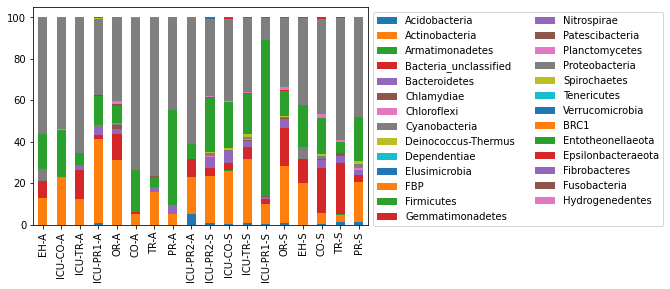

In [89]:
tax2_norm.T.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1),ncol=2)

hacerlo de los 12 primeros

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
tax6= outer_join_df[outer_join_df.taxlevel==6]
del tax6['taxlevel']
del tax6['rankID_x']
del tax6['daughterlevels_x']
del tax6['total_x']
del tax6['rankID_y']
del tax6['daughterlevels_y']
del tax6['total_y']


In [92]:
tax6.columns

Index(['taxon', 'EH-A', 'ICU-CO-A', 'ICU-TR-A', 'ICU-PR1-A', 'OR-A', 'CO-A',
       'TR-A', 'PR-A', 'ICU-PR2-A', 'ICU-PR2-S', 'ICU-CO-S', 'ICU-TR-S',
       'ICU-PR1-S', 'OR-S', 'EH-S', 'CO-S', 'TR-S', 'PR-S', 'total'],
      dtype='object')

# PCA 

In [93]:
from sklearn.decomposition import PCA

pca = PCA()

#locations = tax6.select_dtypes('double')
locations = tax6.set_index('taxon')
del locations['total']
projected = pca.fit_transform(locations)

In [94]:
with pd.ExcelWriter('location.xlsx', engine = 'openpyxl') as writer:
    locations.to_excel(writer, sheet_name='tax6')

In [95]:
locations.head()

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
taxon,,,,,,,,,,,,,,,,,,
Acidobacteria_unclassified,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Acidipila,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bryocella,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Granulicella,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
Acidobacteriaceae_(Subgroup_1),0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0


In [96]:
locations.shape


(676, 18)

In [97]:
projected.shape

(676, 18)

In [98]:
projected

array([[-169.34920902,   35.73395358,  -23.73963549, ...,    0.80309274,
           0.33026629,   -2.11459774],
       [-168.92437352,   35.29453537,  -22.99542174, ...,   -1.29580877,
          -0.29308334,   -4.09958816],
       [-169.80607789,   36.2239642 ,  -24.59202907, ...,    2.17506178,
           0.33649449,   -2.04203191],
       ...,
       [-169.66027871,   36.02853153,  -23.92792582, ...,    3.89513463,
           0.46221137,   -1.2438937 ],
       [-169.8500093 ,   36.24832306,  -24.51673628, ...,    3.51852239,
           0.76239852,   -0.57672065],
       [-169.74201116,   36.12277937,  -24.37566939, ...,    3.62892673,
           1.57073734,    1.78281729]])

In [99]:
pca.explained_variance_ratio_

array([4.41442502e-01, 1.95549846e-01, 1.12436357e-01, 7.20941877e-02,
       6.22077457e-02, 3.72344095e-02, 2.31748823e-02, 1.86604450e-02,
       1.15048432e-02, 8.99808256e-03, 6.98750010e-03, 2.77881104e-03,
       2.30279642e-03, 1.64601574e-03, 1.33507273e-03, 9.95979924e-04,
       3.67036037e-04, 2.83486784e-04])

<BarContainer object of 18 artists>

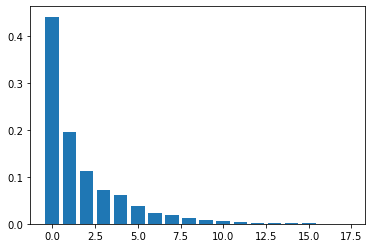

In [100]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

In [101]:
pca.explained_variance_ratio_[:3].sum()

0.7494287052461222

In [102]:
np.log1p(0)

0.0

In [103]:
from sklearn.preprocessing import FunctionTransformer

normalized = FunctionTransformer(np.log1p).fit_transform(locations)
projected = pca.fit_transform(normalized)

In [104]:
normalized.describe()

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,0.311634,0.371263,0.360382,1.335612,0.712518,0.297211,0.214593,0.309176,0.239073,1.604725,1.451215,1.469406,0.764067,0.866411,0.381634,0.640911,0.384447,0.527788
std,1.278774,1.471310,1.409660,1.608266,1.742496,1.329558,1.111490,1.359528,1.162638,1.725711,1.581891,1.631860,1.335025,1.649712,1.461799,1.500632,1.234065,1.450139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,1.098612,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,2.197225,0.000000,0.000000,0.000000,0.000000,0.000000,2.708050,2.397895,2.564949,1.098612,0.693147,0.000000,0.000000,0.000000,0.000000
max,8.913147,8.524367,8.541105,6.929517,8.092851,8.755265,9.438591,9.780698,8.365905,8.149024,7.447168,7.008505,9.273878,8.209036,8.917445,8.255569,7.940228,7.434848


En principio no parece necesario escalar

<BarContainer object of 18 artists>

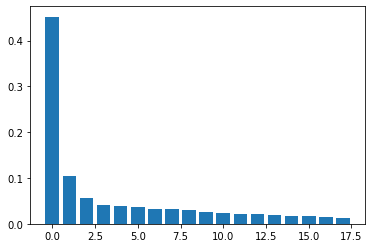

In [105]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

In [106]:
pca.explained_variance_ratio_[:3].sum()

0.6137876521319503

In [107]:
first_four = pd.DataFrame(data =projected[:, :4], index=locations.index, columns = ['PC%d' % n for n in range(1, 5) ])
first_four

,PC1,PC2,PC3,PC4
taxon,,,,
Acidobacteria_unclassified,-1.996126,-0.106064,-0.698994,-0.342271
Acidipila,-1.876259,-0.243494,-0.933803,-0.439784
Bryocella,-2.935912,0.796502,-0.099632,-0.076366
Granulicella,-1.873789,0.103191,0.266127,0.448686
Acidobacteriaceae_(Subgroup_1),-2.161395,0.341203,-0.124135,-0.415938
...,...,...,...,...
Xanthomonadaceae_uncultured,-1.882111,-0.073982,0.146966,-0.231383
Leptospira,-2.063501,0.385600,1.084712,0.654150
Mollicutes_RF39_ge,-2.794766,0.584141,0.167107,-0.005030


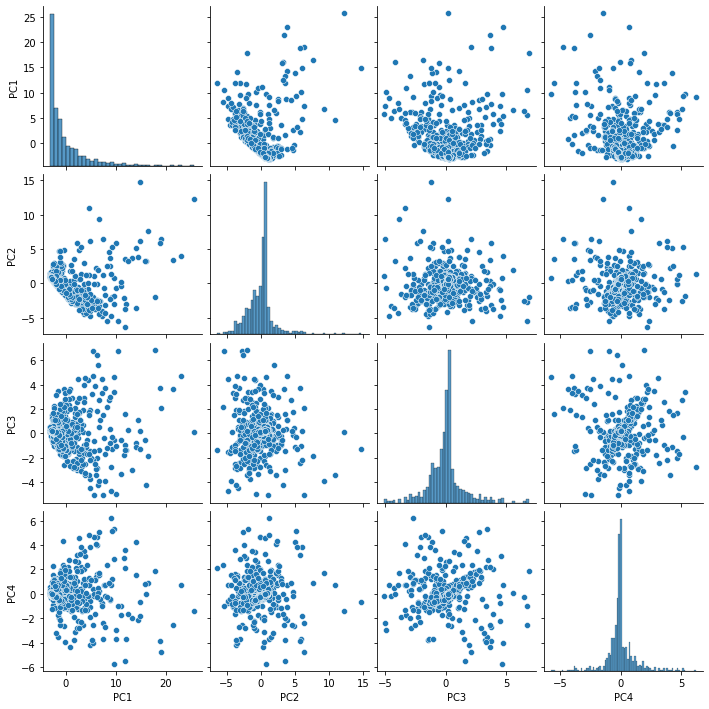

In [108]:
import seaborn as sns

sns.pairplot(first_four, kind='scatter')

In [109]:
import matplotlib.pyplot as plt

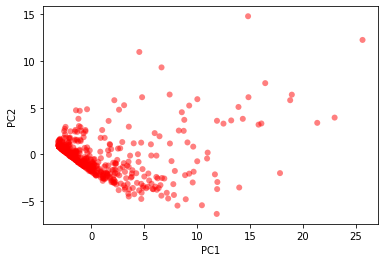

In [110]:
plt.scatter(projected[:, 0], projected[:, 1],
            c='red', edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow_r', 10))
plt.xlabel('PC1')
plt.ylabel('PC2');

cambiar pca por ubicaciones?, y otro nivel de bichos?

# <span style='color:Red'> Network  </span> 

Una de las características importantes del método Bray-Curtis es que varía entre 0 y 1, dos comunidades que no comparten ninguna especie tendrían 1 como resultado.

In [111]:
from scipy.spatial import distance

In [112]:
BC=pd.DataFrame([[distance.braycurtis(locations[i], locations[j]) for i in locations ] for j in locations], 
               columns=locations.columns,index=locations.columns)
BC

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
EH-A,0.000000,0.669913,0.662014,0.771057,0.685372,0.703400,0.670442,0.728068,0.596952,0.807932,0.820355,0.804913,0.907022,0.808600,0.622488,0.821355,0.803005,0.795183
ICU-CO-A,0.669913,0.000000,0.675068,0.857178,0.730299,0.717514,0.732237,0.772208,0.711459,0.784789,0.817000,0.857915,0.783654,0.900831,0.644049,0.931855,0.936420,0.852240
ICU-TR-A,0.662014,0.675068,0.000000,0.828602,0.608669,0.757259,0.780239,0.826462,0.638190,0.769283,0.797991,0.803830,0.880829,0.703817,0.587701,0.755677,0.746445,0.791201
ICU-PR1-A,0.771057,0.857178,0.828602,0.000000,0.637627,0.892866,0.864377,0.944876,0.851499,0.485577,0.501754,0.426046,0.807253,0.731425,0.874253,0.809256,0.826725,0.666667
OR-A,0.685372,0.730299,0.608669,0.637627,0.000000,0.853765,0.857073,0.875735,0.654286,0.642070,0.664564,0.637102,0.881232,0.617053,0.691085,0.678621,0.679221,0.739265
CO-A,0.703400,0.717514,0.757259,0.892866,0.853765,0.000000,0.746707,0.771646,0.713531,0.921864,0.923313,0.921288,0.964442,0.948331,0.794490,0.938112,0.937226,0.904154
TR-A,0.670442,0.732237,0.780239,0.864377,0.857073,0.746707,0.000000,0.658581,0.704944,0.842912,0.835065,0.884215,0.912723,0.882733,0.697370,0.955741,0.926337,0.840095
PR-A,0.728068,0.772208,0.826462,0.944876,0.875735,0.771646,0.658581,0.000000,0.772436,0.898817,0.907013,0.943221,0.936643,0.936497,0.776790,0.967248,0.960602,0.876504
ICU-PR2-A,0.596952,0.711459,0.638190,0.851499,0.654286,0.713531,0.704944,0.772436,0.000000,0.844552,0.862058,0.856462,0.933758,0.759624,0.681252,0.822817,0.773149,0.862141
ICU-PR2-S,0.807932,0.784789,0.769283,0.485577,0.642070,0.921864,0.842912,0.898817,0.844552,0.000000,0.398236,0.424454,0.648549,0.633105,0.712974,0.715922,0.737684,0.586730


In [113]:
tax6

,taxon,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S,total
6,Acidobacteria_unclassified,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
10,Acidipila,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
11,Bryocella,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
12,Granulicella,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,12.0
13,Acidobacteriaceae_(Subgroup_1),0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,Xanthomonadaceae_uncultured,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1213,Leptospira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,13.0
1216,Mollicutes_RF39_ge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1219,Puniceicoccaceae_ge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [114]:
locations

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
taxon,,,,,,,,,,,,,,,,,,
Acidobacteria_unclassified,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Acidipila,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bryocella,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Granulicella,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
Acidobacteriaceae_(Subgroup_1),0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xanthomonadaceae_uncultured,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
Leptospira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
Mollicutes_RF39_ge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
import networkx as nx
#nx.test()

In [116]:
G = nx.from_pandas_adjacency(BC)
G.name = "Graph from pandas adjacency matrix"
print(nx.info(G))

Name: Graph from pandas adjacency matrix
Type: Graph
Number of nodes: 18
Number of edges: 153
Average degree:  17.0000


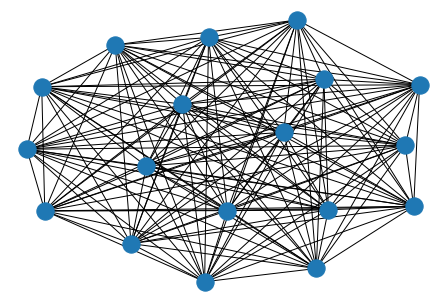

In [117]:
nx.draw(G)

In [1]:
G = nx.from_pandas_adjacency(BC<0.5)
G.name = "Graph from pandas adjacency matrix"
print(nx.info(G))
nx.draw_spring(G,with_labels =True, node_size=800)

NameError: name 'nx' is not defined